# **Изучение закономерностей, определяющих успешность игр**  

Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.  

**План исследования**  
1. Изучение общей информации  
2. Подготовка данных  
3. Проведение исследовательского анализа данных  
4. Составление портрета пользователя каждого региона  
5. Проверка гипотез  
6. Вывод

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Изучаем общую информацию

In [3]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датафрейме мы видим 16715 строк с названиями игр, жанром, годом выпуска, количеством продаж в разных регионах и рейтингом с оценками.

### Подготовка данных

#### Приводим названия столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.head() # проверяем результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Найдем пропущенные значения в столбцах

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
data = data.dropna(subset=['name', 'year_of_release']) # удаляем строки с пропусками в name и year_of_release

In [9]:
data.isna().sum() # проверяем удаление строк

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [10]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [11]:
data.query('user_score == "tbd"')['user_score'].sum() # проверяем, произошла ли замена

0

In [12]:
data['rating'] = data['rating'].fillna('No info')

In [14]:
data.query('critic_score.isna() == True') # выведем пропуски в critic_score для ознакомления

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No info
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No info
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,No info
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,No info
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,No info
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,No info
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No info
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No info
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No info


Пропуски обнаружены в следующих столбцах: name, year_of_release, genre, critic_score, user_score, rating.  
В столбце name всего 2 пропуска, их можно удалить, на общую картину они не повлияют. Вместе с ним удалились пропуски из genre.  
Пропуски в столбце year_of_release составляют 269 строк или 1.6% от общей таблицы - их удалили.  
Пропуски в critic_score, user_score, rating могли получиться из-за того что игра вышла давно и ее не оценивали, либо недавно вышла и не успели оценить или игра непопулярна. Также есть шанс тех. ошибки.  
Оставшиеся пропуски мы не можем заменить, т.к. у нас нет данных.  
TBD — обозначает «To Be Determined» (англ. «будет определено»). Для удобства это значение можно заменить на NaN.  
Пропуски в столбце rating заменены на No info.  
ESRB — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Основана в 1994 году

#### Заменяем типы данных

In [15]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [16]:
data['user_score'] = data['user_score'].astype('float')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Для столбца year_of_release меняем тип данных на Int64, т.к. год целое число. Просто в int не удается поменять в связи с наличием пропусков в столбце.  
user_score - это оценка, которая выражена с дробной частью

#### Проверяем данные на дубликаты

In [18]:
data.duplicated().sum() # проверяем на явные дубликаты

0

In [19]:
data[['name', 'platform', 'year_of_release']].duplicated().sum() # проверяем на неявные дубликаты

1

In [20]:
data[['name', 'platform', 'year_of_release']].value_counts()

name                              platform  year_of_release
Madden NFL 13                     PS3       2012               2
 Beyblade Burst                   3DS       2016               1
Ratatouille                       PC        2007               1
Rapala Tournament Fishing!        X360      2006               1
Rapala Trophies                   PSP       2006               1
                                                              ..
Halo Wars                         X360      2009               1
Halo: Combat Evolved              PC        2003               1
                                  XB        2001               1
Halo: Combat Evolved Anniversary  X360      2011               1
¡Shin Chan Flipa en colores!      DS        2007               1
Length: 16443, dtype: int64

In [21]:
data.query('name == "Madden NFL 13"') # ищем этот дубликат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [22]:
data = data.drop(16230).reset_index() # удаляем его

#### Выведем суммарные продажи со всех регионов

In [23]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [24]:
data.head() # проверяем наличие столбца

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No info,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No info,31.38


#### Промежуточные выводы  

**В данном разделе:**  
- приведены названия столбцов к нижнему регистру  
- по возможности удалены пропуски  
- изменено значение tbd на NaN  
- изменены типы данных, где это было необходимо  
- удалили неявный дубликат  
- добавлен столбец с суммарными продажами

### Исследовательский анализ данных

#### Количество выпускаемых игр в разные годы

In [26]:
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_per_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


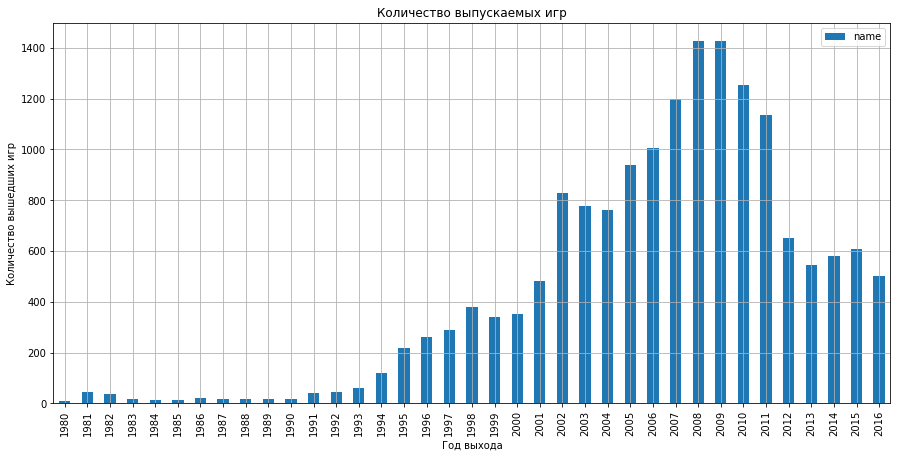

In [27]:
games_per_year.plot(kind='bar', grid=True, figsize=(15, 7),
                    title='Количество выпускаемых игр', 
                    xlabel='Год выхода', ylabel='Количество вышедших игр');

На графике мы видим что больше всего игр выпускалось в 2008 и 2009 годах (1427 и 1426 игр).  
с 1980 до 1994 выпуск игр был в очень маленьком количестве. Это может быть связано со слабым развитием технологий в этой индустрии.  
В 1994 года мы видим двукратный рост выпущенных игр и далее выпуск игр стремительно растет вплоть до 2008 года. В 1999 и 2000, а так же в 2003 и 2004 годах был небольшой спад, возможно, из-за резкого "выстрела" в прошлые годы.  
Начиная с 2010 года начался значительный спад. Это можно связать с развитием других технологий, например VR, и развитием индустрии мобильных игр. Еще возможно причина в том, что с развитием технологий, выпуск игр становится значительно дольше и дороже.  
Я считаю, что данные можно взять начиная с 1994 года. Ранее было выпущено слишком мало игр, в них сложно будет искать закономерности успешности игр.

#### Количество проданных игр на различных платформах

In [28]:
total_sales_platform = data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
total_sales_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


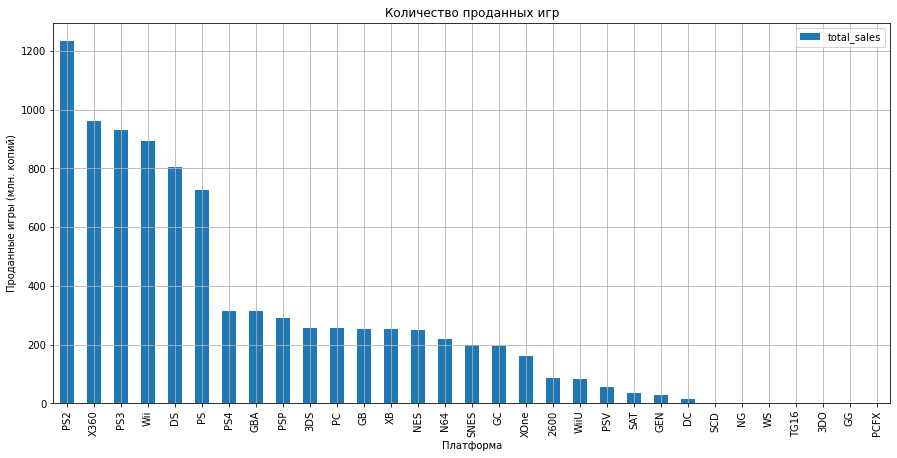

In [29]:
total_sales_platform.plot(kind='bar', grid=True, figsize=(15, 7),
                    title='Количество проданных игр', 
                    xlabel='Платформа', ylabel='Проданные игры (млн. копий)');

На графике видим, что за всё время больше всего продано игр на PS2 1233.6 млн копий, далее следуют X360 (961.3), PS3 (931.3), Wii (891.2), DS (802.8), PS (727.6). 


In [30]:
def graph(platform_name):
    data.query('platform == @platform_name').pivot_table(
        index='year_of_release', values='name', aggfunc='count').plot(
        kind='bar', grid=True, figsize=(8, 5),
                    title=f'Количество выпущенных игр на платформе {platform_name}', 
                    xlabel='Годы', ylabel='Количество выпущенных игр')
    plt.show()

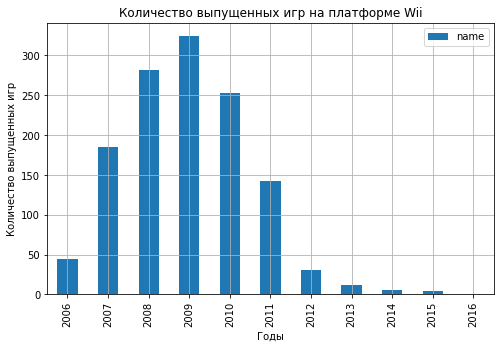

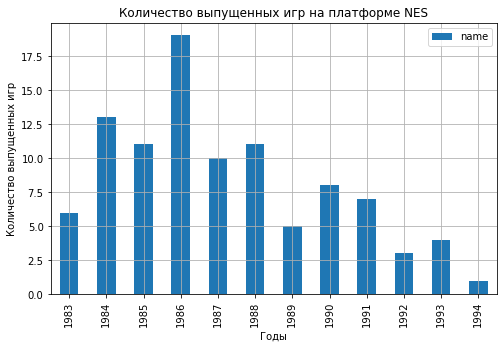

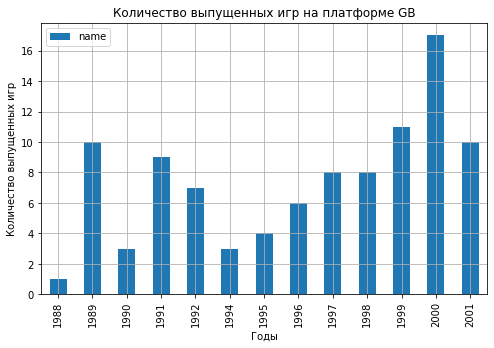

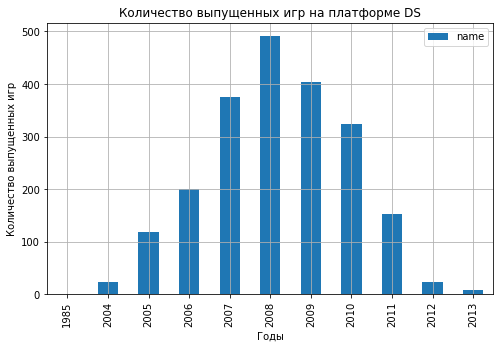

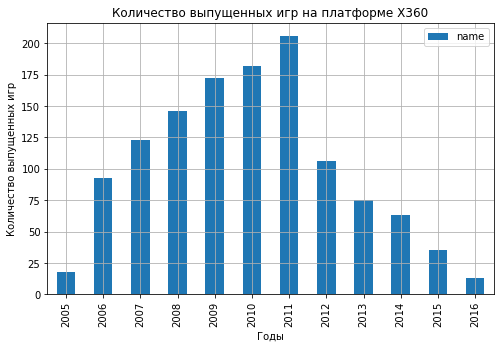

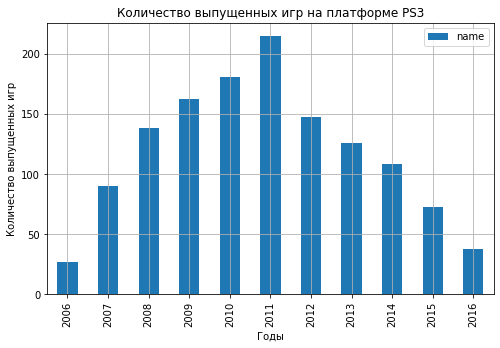

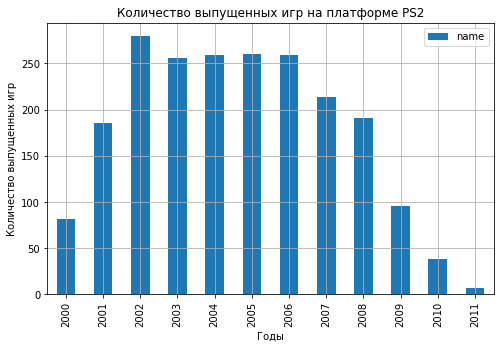

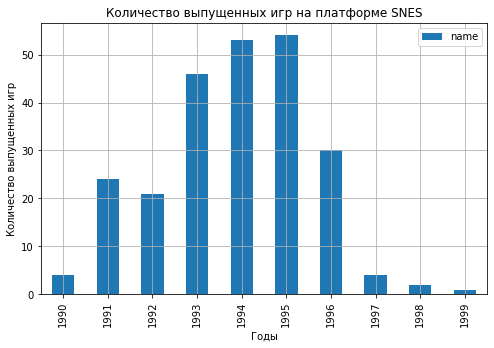

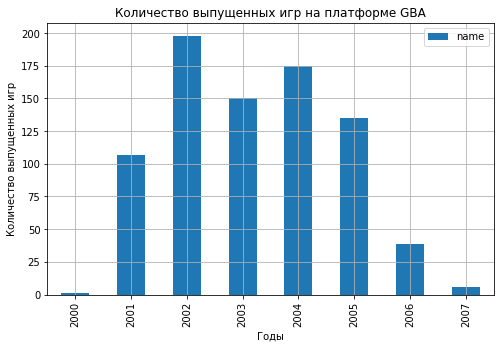

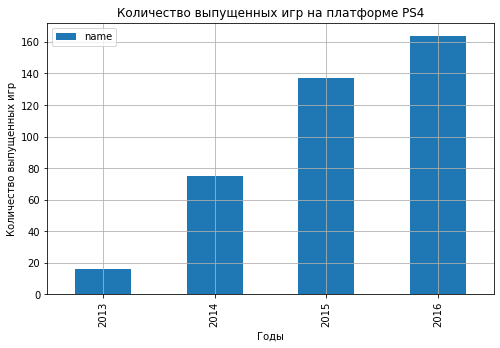

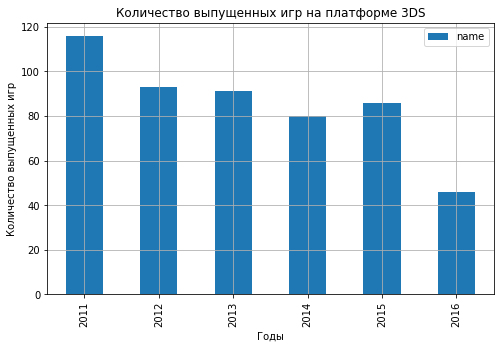

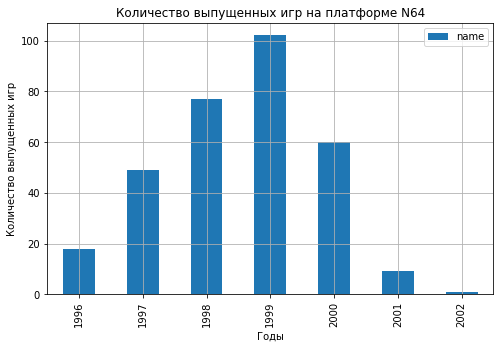

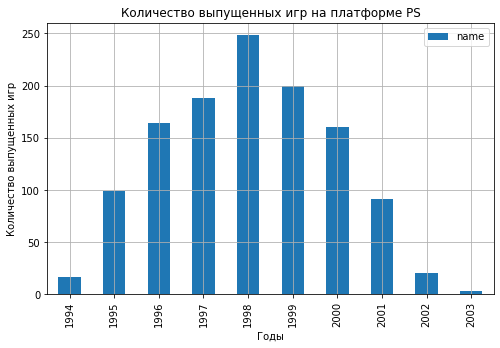

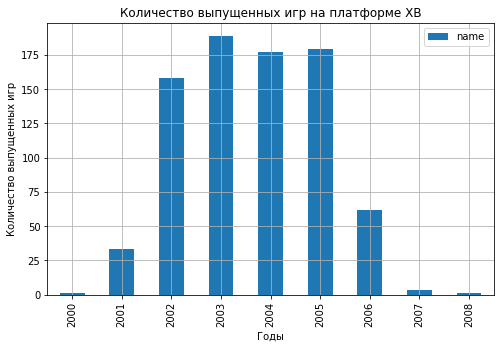

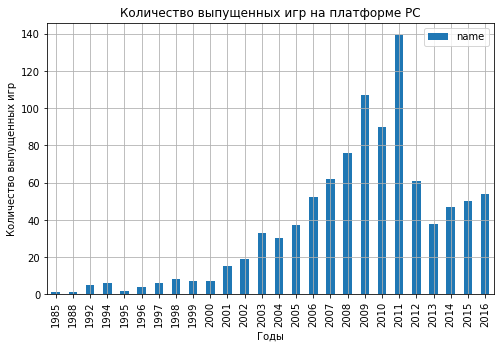

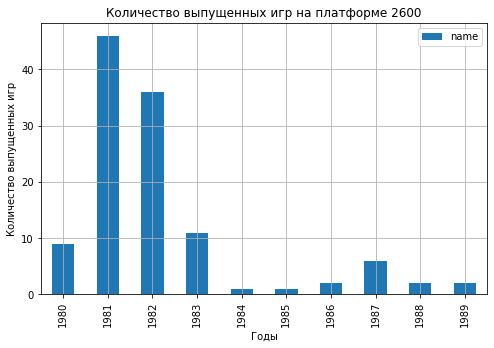

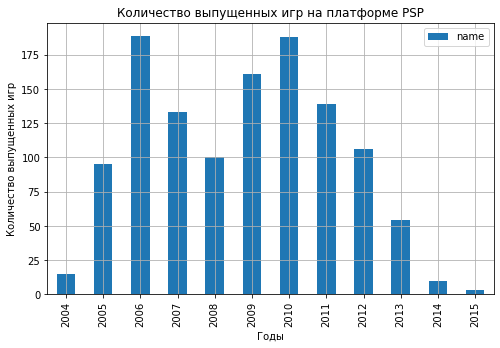

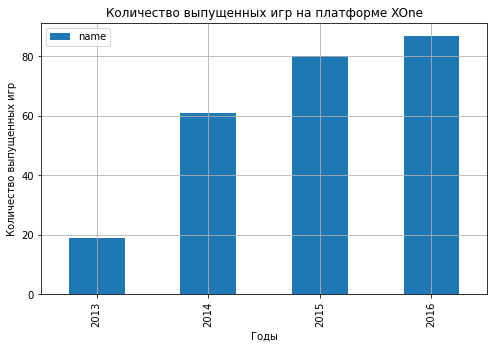

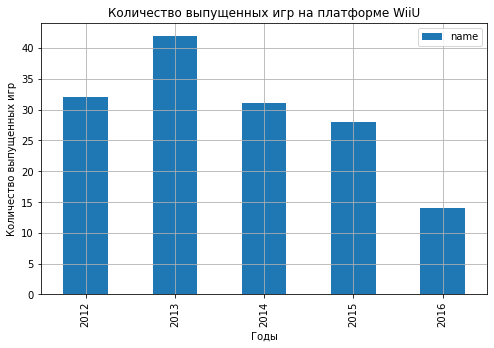

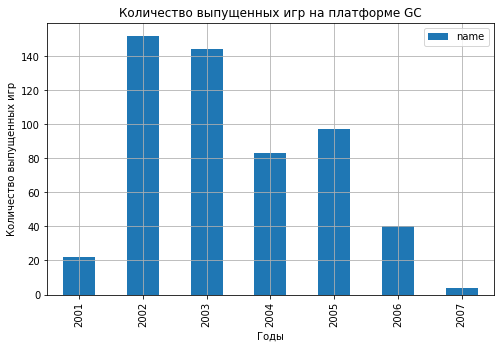

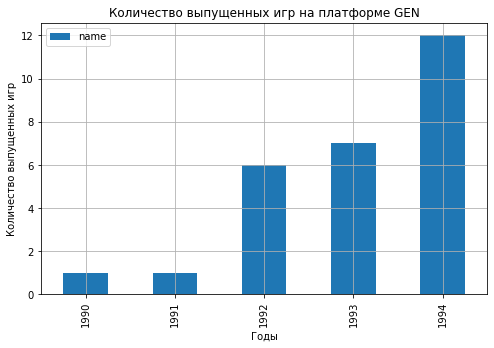

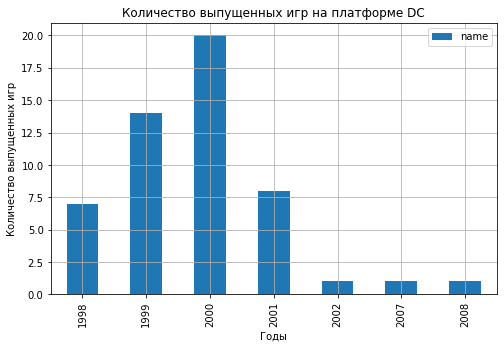

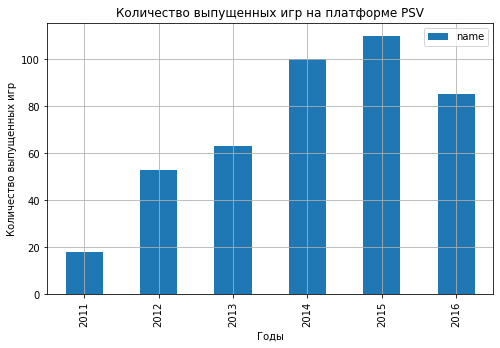

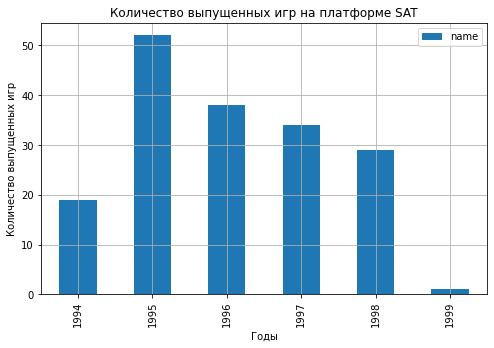

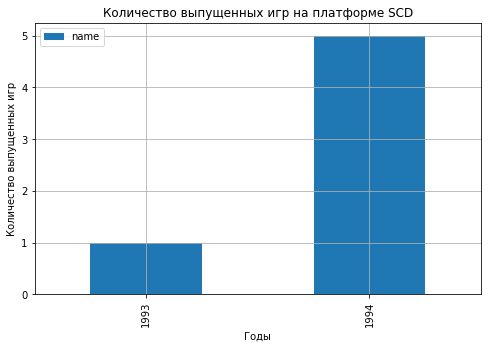

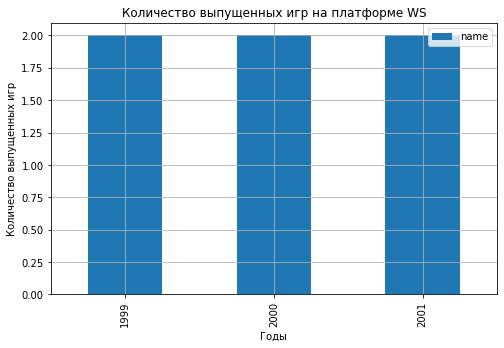

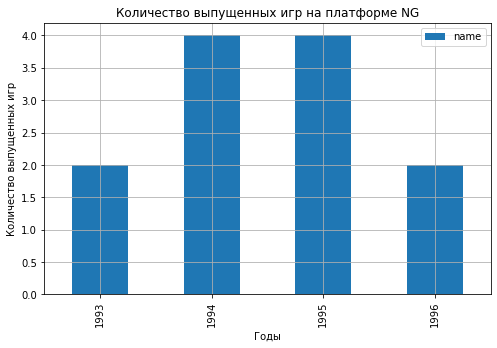

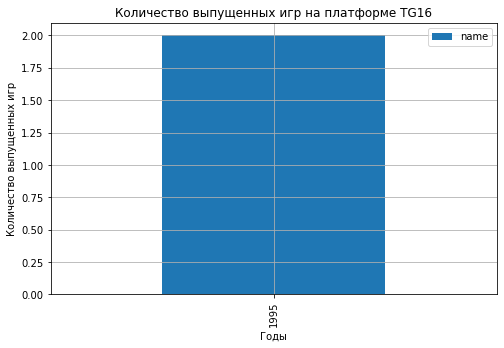

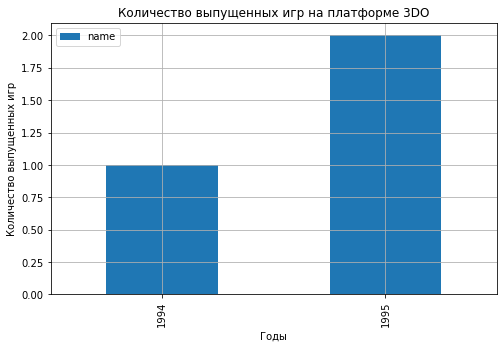

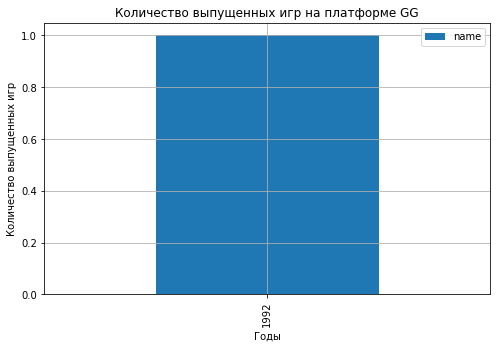

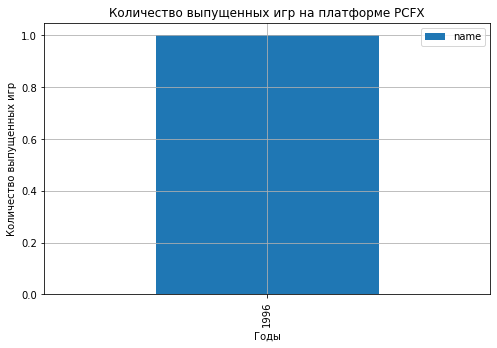

In [31]:
for i in data['platform'].unique():
    plt.show(graph(i));

In [32]:
data.query('platform == "DS" and year_of_release == 1985')

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,No info,0.02


In [33]:
data = data.drop(15704).reset_index()

Strongest Tokyo University Shogi DS	выпущена в 1985, а Nintendo DS выпущена в 2004 году.  
Здесь какая-то ошибка, можем удалить строку.

In [34]:
# определим медианное время жизни платформы
lifetime = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
print((lifetime['max'] - lifetime['min'] + 1).median())

year_of_release    7.0
dtype: float64


Медианное время жизни платформы 7 лет.  
На графике "Количество выпускаемых игр" видно, что с 2013 года начинается рост. В этот же год появились такие платформы как PS4 и XOne.  
За актуальный период данных можем взять с 2013 г. по 2016 г.

#### Лидеры по продажам

In [37]:
actual_platform = data.query('year_of_release >= 2013')
actual_platform

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,16,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,23,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No info,14.63
33,33,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,No info,14.60
42,42,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16430,16431,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No info,0.01
16434,16435,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,No info,0.01
16437,16438,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No info,0.01
16439,16440,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No info,0.01


In [38]:
actual_platform.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


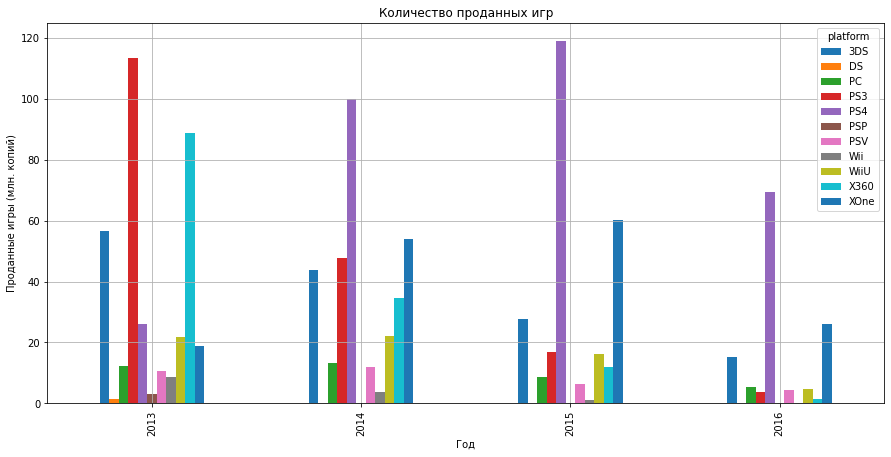

In [39]:
actual_platform.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    kind='bar', grid=True, figsize=(15, 7),
    title='Количество проданных игр', 
    xlabel='Год', ylabel='Проданные игры (млн. копий)');

Как можно видеть из графика, сумарно по продажам за 2013 - 2016 гг. лидирует PS4 (314.4 млн копий).  
В топ-5 по продажам входят - PS4, PS3, XOne, 3DS, X360.  
Из выделенного топ-5 рост продаж замечен у PS4 и XOne, снижение продаж у PS3, 3DS, X360.

#### Построим график "Ящик с усами"

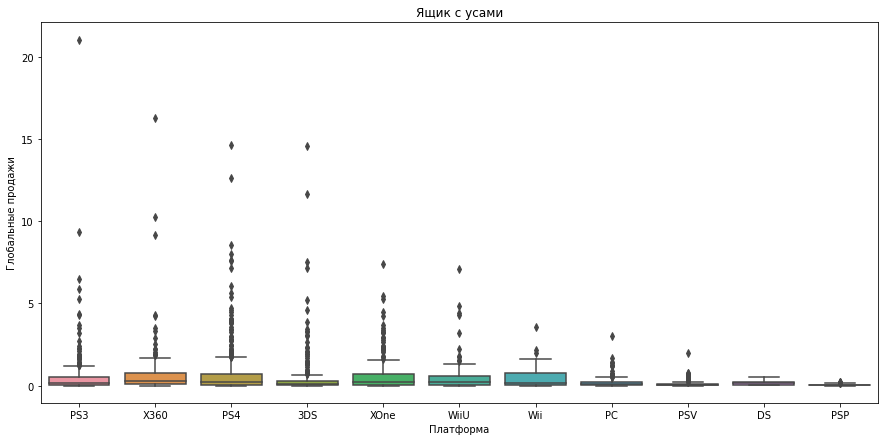

In [40]:
# Построим диаграмму с выбросами
plt.figure(figsize=(15, 7))
sns.boxplot(data=actual_platform, x='platform', y='total_sales')
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.show()

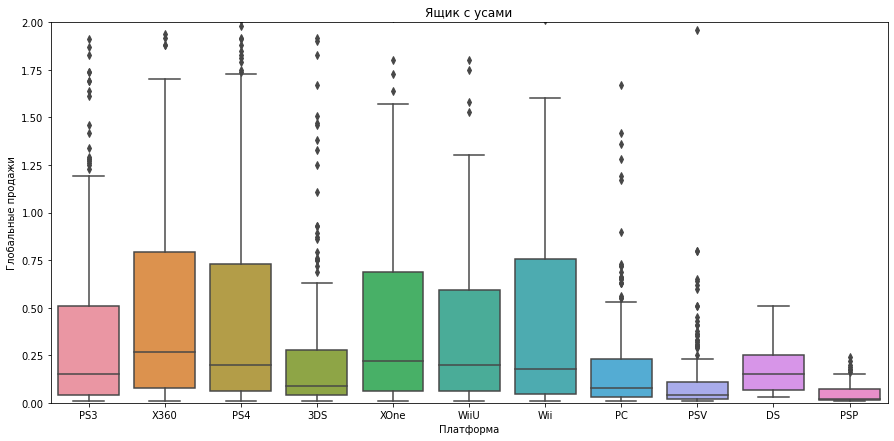

In [41]:
#Построим диаграмму с масштабированием данных 
plt.figure(figsize=(15, 7))
sns.boxplot(data=actual_platform, x='platform', y='total_sales')
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
#plt.ylim(0, 1.75)
plt.ylim(0, 2)
plt.show()

In [42]:
actual_platform.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


Можем отметить, что среднее значение у всех платформ выше медианного.  
Среднее значение у 3DS, PS3 и PS4 превышает значение 3-го квантиля.  
Самые высокие медианные значения у X360 (0.27), XOne (0.22) и PS4 (0.20) с WiiU (0.20).

#### Влияние отзывов пользователей и критиков на продажи

In [43]:
def corr_graph(platform_name):
    actual_platform.query('platform == @platform_name').plot(
        title=f'Зависимость продаж от отзывов критиков на платформе {platform_name}',
        xlabel='Оценка критиков', ylabel='Проданные игры (млн. копий)', 
        x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
    plt.show()
    print(f'Корреляция между отзывами критиков и продажами: ', 
          actual_platform.query('platform == @platform_name')['critic_score'].corr(
        actual_platform.query('platform == @platform_name')['total_sales']))
    
    actual_platform.query('platform == @platform_name').plot(
        title=f'Зависимость продаж от отзывов пользователей на платформе {platform_name}',
        xlabel='Оценка пользователей', ylabel='Проданные игры (млн. копий)',
        x='user_score', y='total_sales', kind='scatter', alpha=0.3)
    plt.show()
    print(f'Корреляция между отзывами пользователей и продажами: ', 
          actual_platform.query('platform == @platform_name')['user_score'].corr(
        actual_platform.query('platform == @platform_name')['total_sales']))

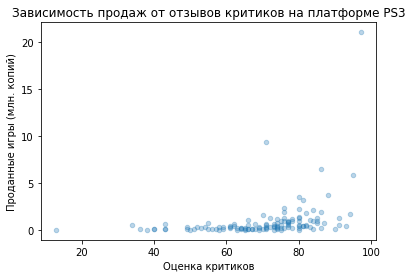

Корреляция между отзывами критиков и продажами:  0.3342853393371919


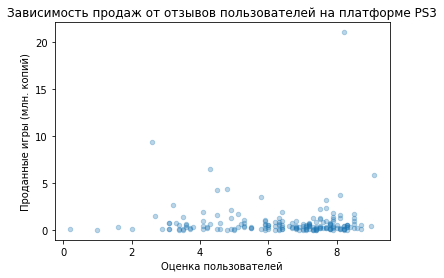

Корреляция между отзывами пользователей и продажами:  0.0023944027357566925


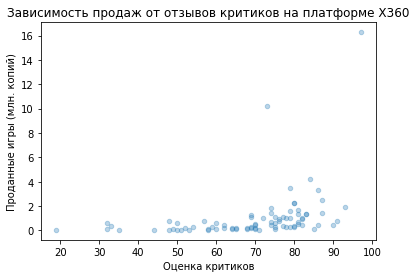

Корреляция между отзывами критиков и продажами:  0.3503445460228664


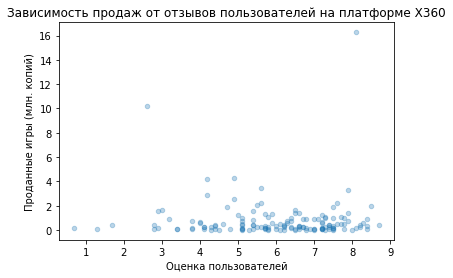

Корреляция между отзывами пользователей и продажами:  -0.011742185147181342


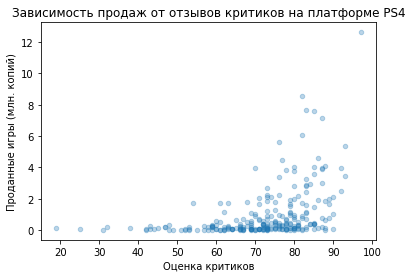

Корреляция между отзывами критиков и продажами:  0.40656790206178095


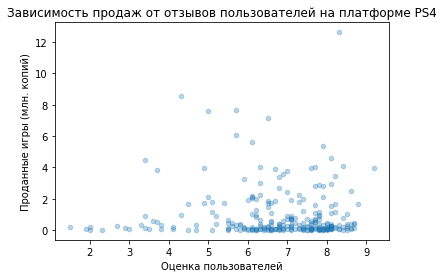

Корреляция между отзывами пользователей и продажами:  -0.031957110204556376


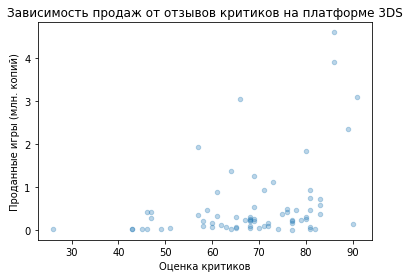

Корреляция между отзывами критиков и продажами:  0.3570566142288103


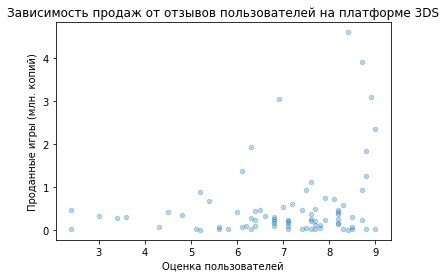

Корреляция между отзывами пользователей и продажами:  0.24150411773563016


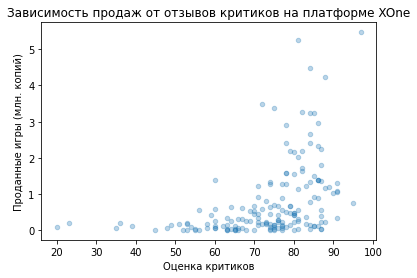

Корреляция между отзывами критиков и продажами:  0.4169983280084017


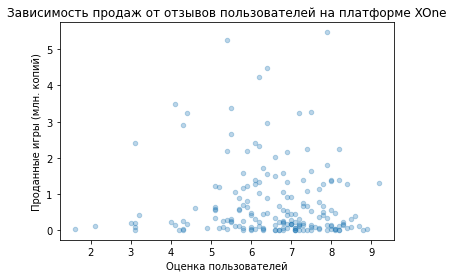

Корреляция между отзывами пользователей и продажами:  -0.06892505328279414


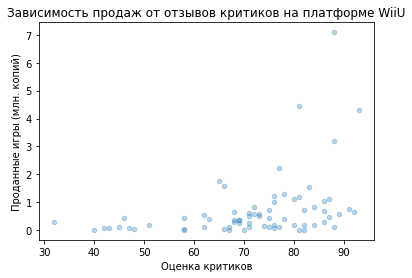

Корреляция между отзывами критиков и продажами:  0.3764149065423912


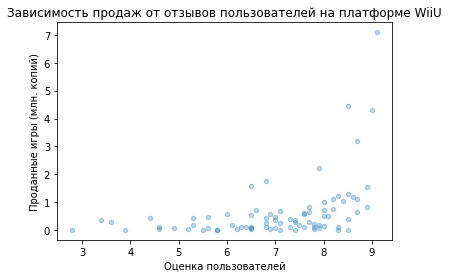

Корреляция между отзывами пользователей и продажами:  0.4193304819266187


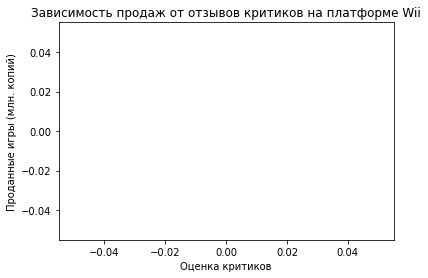

Корреляция между отзывами критиков и продажами:  nan


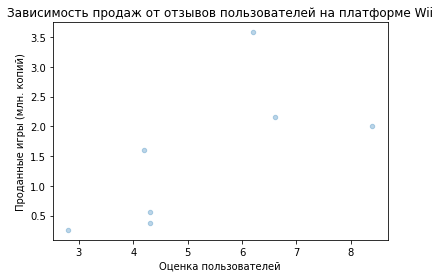

Корреляция между отзывами пользователей и продажами:  0.6829417215362368


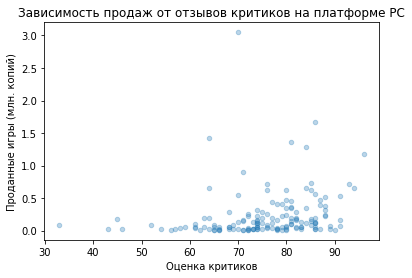

Корреляция между отзывами критиков и продажами:  0.19603028294369382


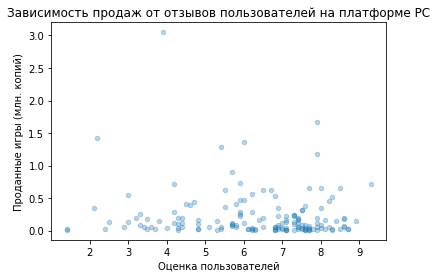

Корреляция между отзывами пользователей и продажами:  -0.0938418695247674


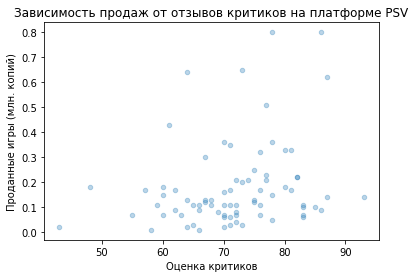

Корреляция между отзывами критиков и продажами:  0.2547423503068656


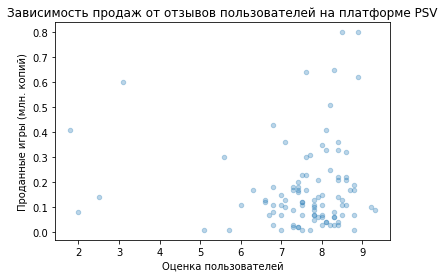

Корреляция между отзывами пользователей и продажами:  0.0009424723319108626


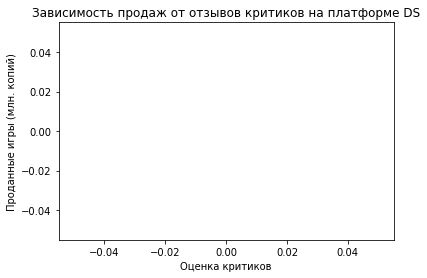

Корреляция между отзывами критиков и продажами:  nan


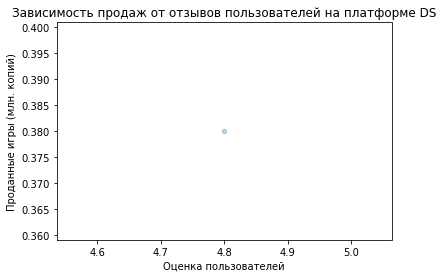

Корреляция между отзывами пользователей и продажами:  nan


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


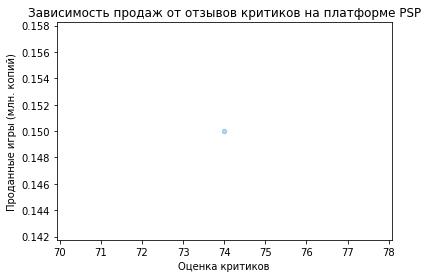

Корреляция между отзывами критиков и продажами:  nan


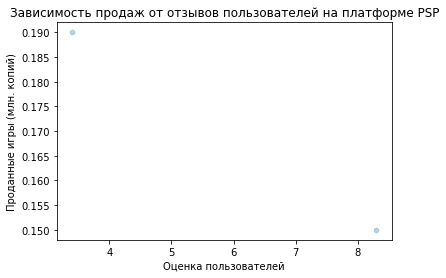

Корреляция между отзывами пользователей и продажами:  -0.9999999999999999


In [44]:
for platform in actual_platform['platform'].unique():
    corr_graph(platform);

In [46]:
actual_platform.query('platform == "DS"').info() # проверяем почему получились "пустые графики"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 3810 to 14484
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level_0          8 non-null      int64  
 1   index            8 non-null      int64  
 2   name             8 non-null      object 
 3   platform         8 non-null      object 
 4   year_of_release  8 non-null      Int64  
 5   genre            8 non-null      object 
 6   na_sales         8 non-null      float64
 7   eu_sales         8 non-null      float64
 8   jp_sales         8 non-null      float64
 9   other_sales      8 non-null      float64
 10  critic_score     0 non-null      float64
 11  user_score       1 non-null      float64
 12  rating           8 non-null      object 
 13  total_sales      8 non-null      float64
dtypes: Int64(1), float64(7), int64(2), object(4)
memory usage: 968.0+ bytes


In [47]:
actual_platform.query('platform == "PSP"').info() # проверяем почему получились "пустые графики"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 6808 to 16409
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level_0          67 non-null     int64  
 1   index            67 non-null     int64  
 2   name             67 non-null     object 
 3   platform         67 non-null     object 
 4   year_of_release  67 non-null     Int64  
 5   genre            67 non-null     object 
 6   na_sales         67 non-null     float64
 7   eu_sales         67 non-null     float64
 8   jp_sales         67 non-null     float64
 9   other_sales      67 non-null     float64
 10  critic_score     1 non-null      float64
 11  user_score       2 non-null      float64
 12  rating           67 non-null     object 
 13  total_sales      67 non-null     float64
dtypes: Int64(1), float64(7), int64(2), object(4)
memory usage: 7.9+ KB


In [48]:
actual_platform.query('platform == "Wii"').info() # проверяем почему получились "пустые графики"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 358 to 16046
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level_0          23 non-null     int64  
 1   index            23 non-null     int64  
 2   name             23 non-null     object 
 3   platform         23 non-null     object 
 4   year_of_release  23 non-null     Int64  
 5   genre            23 non-null     object 
 6   na_sales         23 non-null     float64
 7   eu_sales         23 non-null     float64
 8   jp_sales         23 non-null     float64
 9   other_sales      23 non-null     float64
 10  critic_score     0 non-null      float64
 11  user_score       7 non-null      float64
 12  rating           23 non-null     object 
 13  total_sales      23 non-null     float64
dtypes: Int64(1), float64(7), int64(2), object(4)
memory usage: 2.7+ KB


По итогам графиков и расчетам корреляции можно сказать, что корреляция между отзывами пользователей и продажами прослеживается только у платформы WiiU в средней степени (0.42). У остальных платформ эта корреляция незначительная, либо вообще отсутствует.  
Что касается корреляции между отзывами критиков и продажами, то тут прослежавается средняя зависимость у всех платформ, кроме PSV и PC. PSV имеет степень корреляции 0.13. Лидером является XOne - 0.42  
DS, PSP и Wii не берем в расчет из-за недостаточности данных.

#### Распределение игр по жанрам

In [49]:
total_genre = actual_platform.pivot_table(
    index='genre', values='name', aggfunc='count').sort_values(
    by='name', ascending=False)
total_genre # выводим распределение игр по жанрам

,name
genre,
Action,766
Role-Playing,292
Adventure,245
Sports,214
Shooter,187
Misc,155
Racing,85
Fighting,80
Platform,74


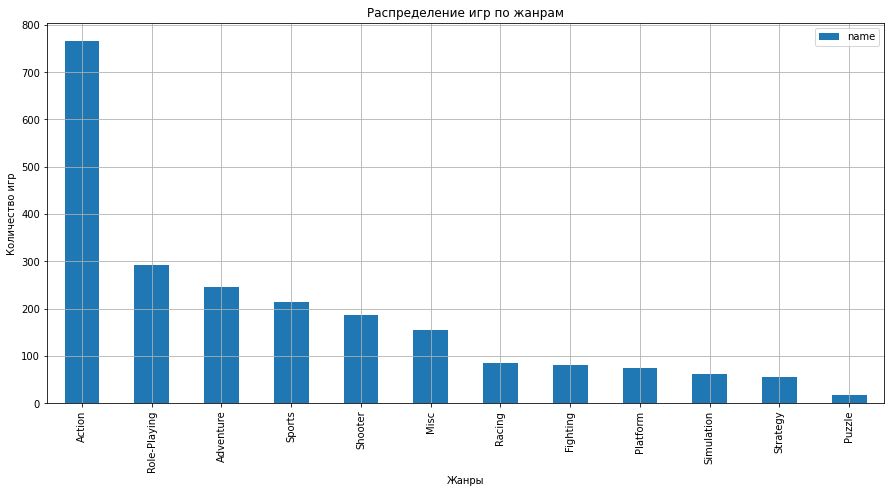

In [50]:
total_genre.plot(kind='bar', grid=True, figsize=(15, 7),
    title='Распределение игр по жанрам', 
    xlabel='Жанры', ylabel='Количество игр');

In [51]:
total_sales_genre = actual_platform.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
total_sales_genre # выводим продажи игр по жанрам

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


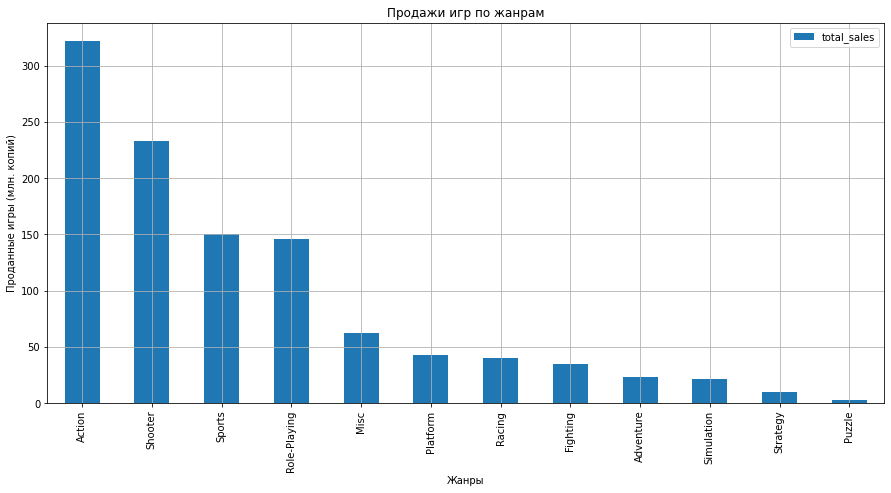

In [52]:
total_sales_genre.plot(kind='bar', grid=True, figsize=(15, 7),
    title='Продажи игр по жанрам', 
    xlabel='Жанры', ylabel='Проданные игры (млн. копий)');

In [53]:
actual_platform.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
Adventure,245.0,0.096490,0.216445,0.01,0.02,0.030,0.0700,1.66
Fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
Misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18
Platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
Puzzle,17.0,0.186471,0.325172,0.01,0.02,0.060,0.1100,1.19
Racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
Role-Playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
Shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63


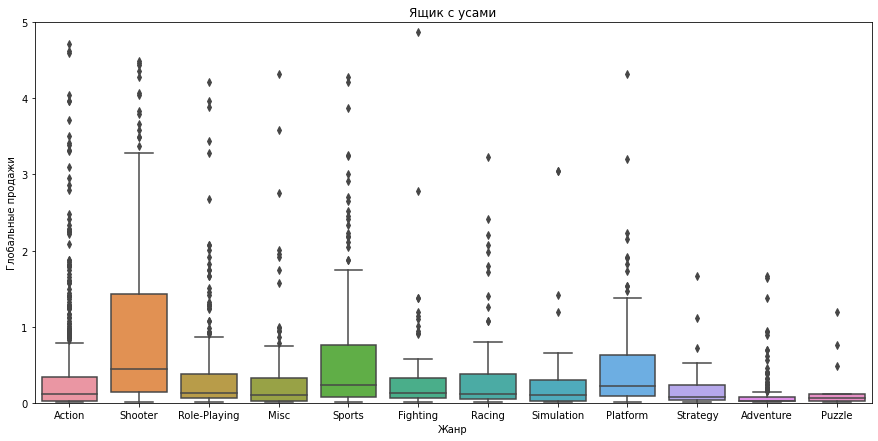

In [54]:
#Построим диаграмму с масштабированием данных 
plt.figure(figsize=(15, 7))
sns.boxplot(data=actual_platform, x='genre', y='total_sales')
plt.title('Ящик с усами')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.ylim(0, 5)
plt.show()

На графиках мы видим, что лидером среди жанров по количеству игр и продажам является Action, но на диаграмме размаха видно, что у него слишком много выбросов.  

Самым стабильным жанром можно назвать Shooter, у него самое высокое среднее и медианное значение.

#### Промежуточные выводы

**В данном разделе мы выявили:**  
- больше всего игр выпускалось в 2008 и 2009 годах (1427 и 1426 игр).
- тройка лидеров по проданным играм за всё время - PS2 1255.7 млн копий, далее следуют X360 (971.4) и PS3 (939.7)  
- в среднем, срок жизни платформы 7 лет.  
- сумарно по продажам за 2013 - 2016 гг. лидирует PS4 (314.4 млн копий). В топ-5 по продажам входят - PS4, PS3, XOne, 3DS, X360. Из выделенного топ-5 рост продаж замечен у PS4 и XOne, снижение продаж у PS3, 3DS, X360.  
- корреляция между отзывами пользователей и продажами прослеживается только у платформы WiiU в средней степени (0.42). У остальных платформ эта корреляция незначительная, либо вообще отсутствует. Что касается корреляции между отзывами критиков и продажами, то тут прослежавается средняя зависимость у всех платформ, кроме PSV и PC. PSV имеет степень корреляции 0.13. Лидером является XOne - 0.42  
- лидером среди жанров по количеству игр и продажам является Action, но на диаграмме размаха видно, что у него слишком много выбросов. Самым стабильным жанром можно назвать Shoter, у него самое высокое среднее и медианное значение.

### Портрет пользователя каждого региона

#### Самые популярные платформы (топ-5). 

In [55]:
# создадим словарь для регионов
glossary = {'na_sales':'Северная Америка', 'eu_sales':'Европа', 'jp_sales':'Япония'}

In [56]:
def popular_in_region(group, region):
    actual_platform.pivot_table(
        index=group, values=region, aggfunc='sum').sort_values(
        by=region, ascending=False).plot(
        kind='bar', grid=True, figsize=(10,5),
        title=glossary[region], 
        xlabel='Платформа', ylabel='Проданные игры (млн. копий)');
    actual_platform.pivot_table(index=group, values=region, aggfunc='sum').sort_values(
        by=region, ascending=False).plot(
        kind='pie', title='Доли продаж игр', ylabel=glossary[region], 
        autopct='%1.0f%%', figsize=(8, 8), subplots=True);

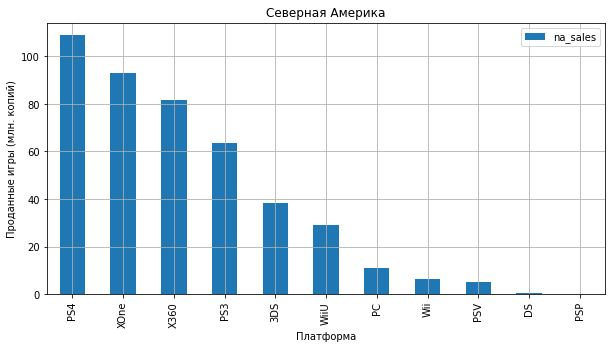

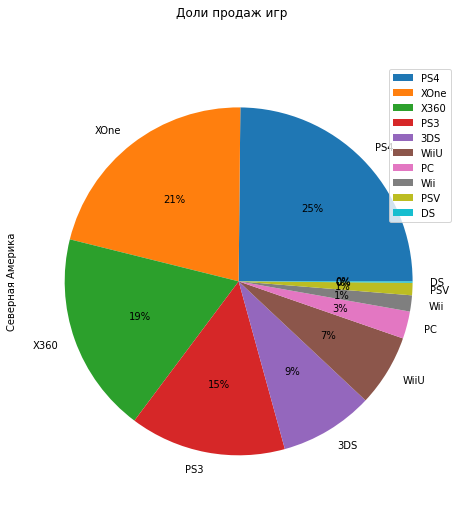

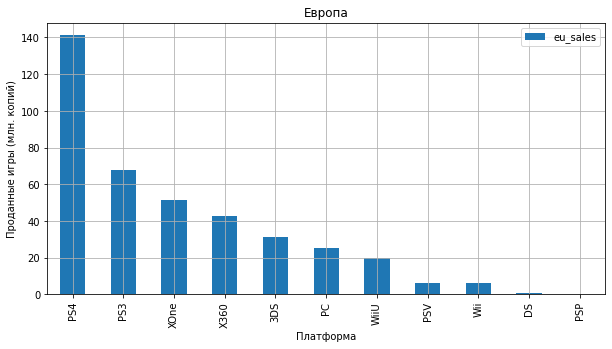

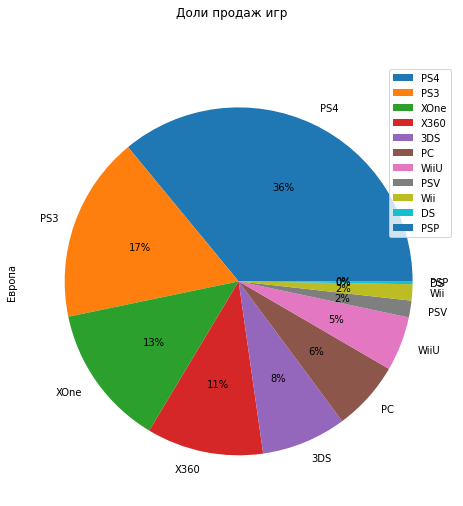

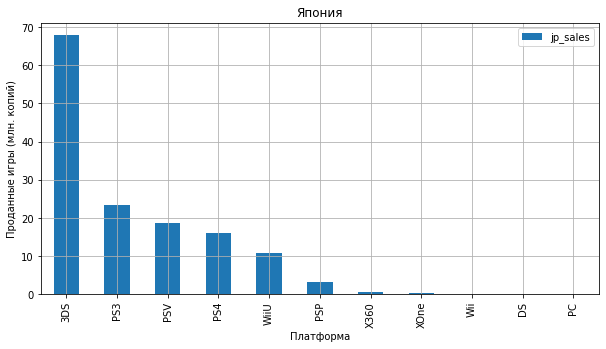

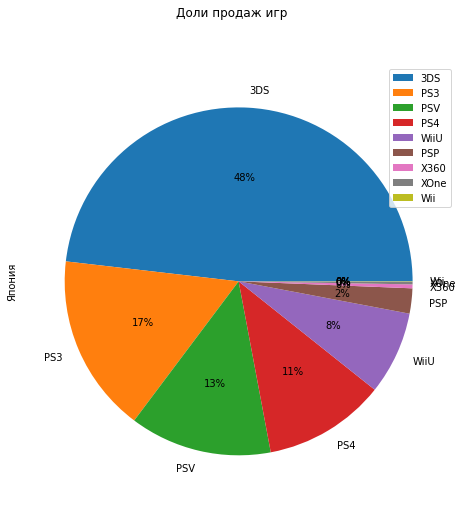

In [57]:
popular_in_region('platform', 'na_sales')
popular_in_region('platform', 'eu_sales')
popular_in_region('platform', 'jp_sales')

За последние 3+ года:  
В Северной Америке самой популярной платформой является PS4, доля продаж игр на ней 25%. Далее идут XOne 21%, X360 19% и PS3 15%. 
В Европе самой популярной платформой тоже является PS4 с долей продаж игр 36%. Далее идут PC3 17% и XOne 13%.
В Японии самой популярной платформой является 3DS с долей продаж игр 48%. Далее идёт PS3 с 17% и PSV с 13%.

#### Самые популярные жанры (топ-5)

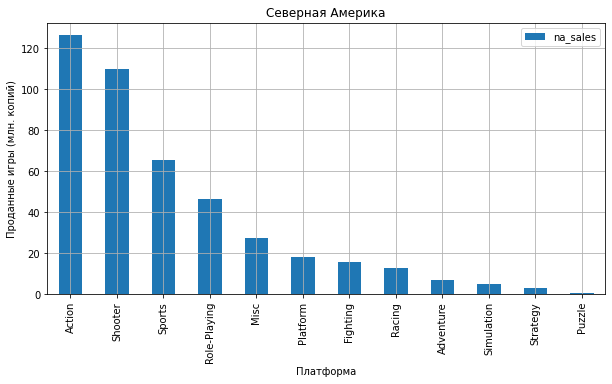

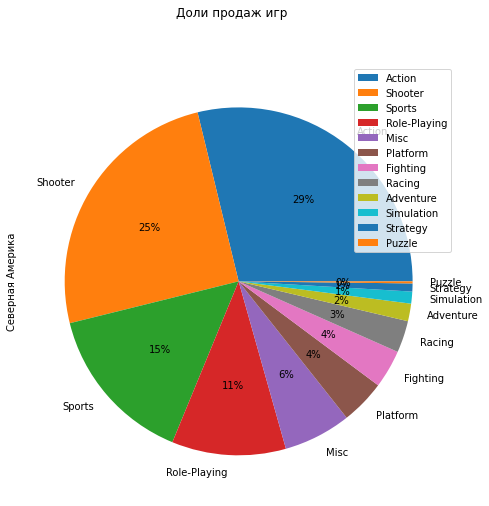

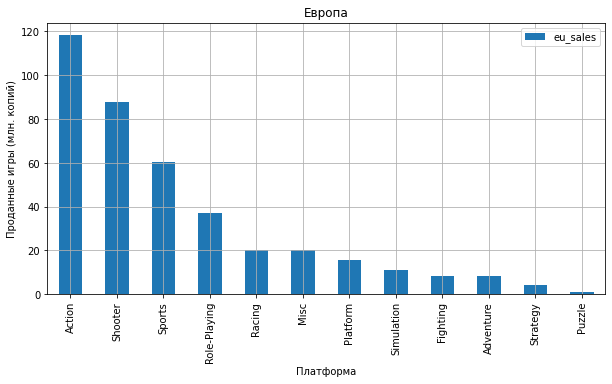

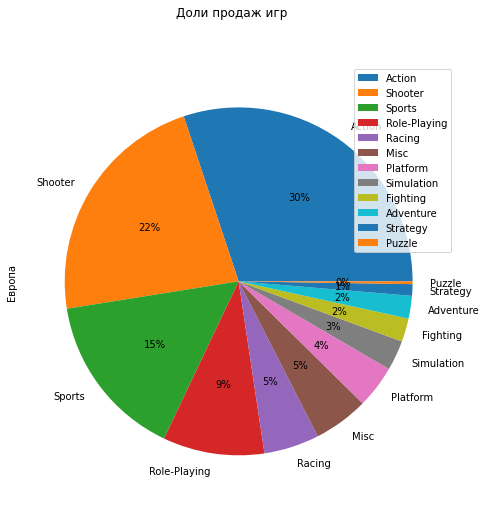

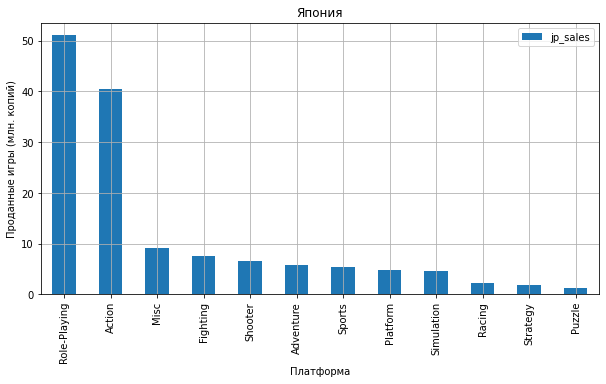

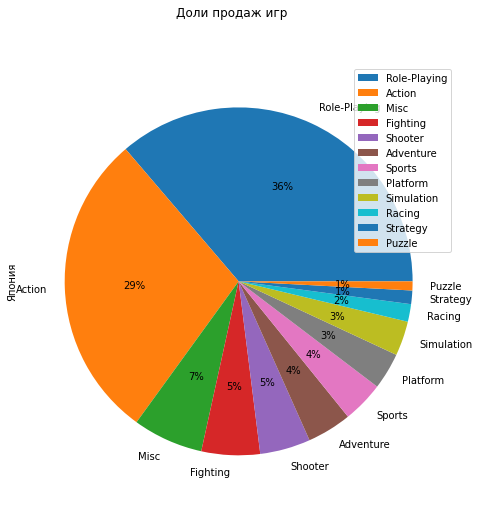

In [58]:
popular_in_region('genre', 'na_sales')
popular_in_region('genre', 'eu_sales')
popular_in_region('genre', 'jp_sales')

В Северной Америке и в Европе самыми популярными являются следующие жанры - Action, Shooter, Sports. Лидером является жанр Action - 29% в Америке и 30% в Европе. Shooter занимает 25% в Америке и 22% в Европе.  
В Японии лидерами с большим отрывом являются жанры Role-Playing 36% и Action 29%. Такой отрыв в Role-Playing можно предположить из-за другой культуры страны.

#### Влияние рейтинга ESRB на продажи в отдельном регионе

Типы рейтинга:  
«E» («Everyone») — «Для всех»  
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.  
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
«AO» («Adults Only 18+») — «Только для взрослых»  
«EC» («Early childhood») — «Для детей младшего возраста»  
"K-A" ("Kids to Adults") — «Для всех», до 1 января 1998 года  
«RP» («Rating Pending») — «Рейтинг ожидается»

In [59]:
def popular_in_region(region):
    actual_platform.pivot_table(
        index='rating', values=region, aggfunc='sum').sort_values(
        by=region, ascending=False).plot(
        kind='bar', grid=True, figsize=(10,5),
        title=glossary[region], 
        xlabel='Рейтинг', ylabel='Проданные игры (млн. копий)');

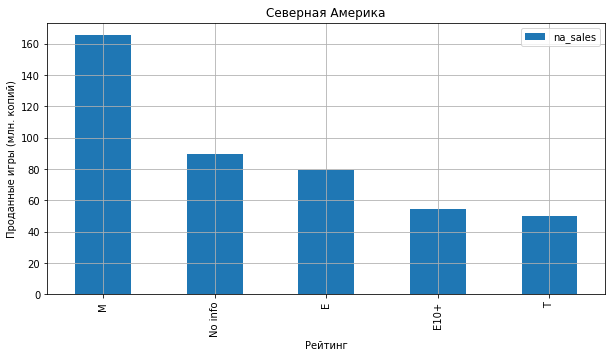

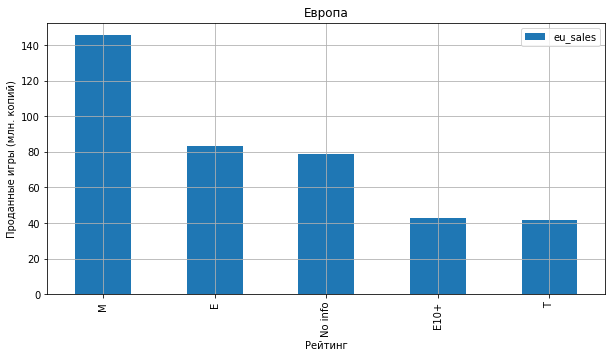

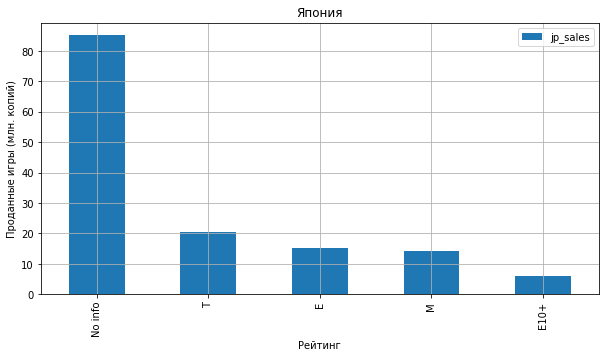

In [60]:
popular_in_region('na_sales')
popular_in_region('eu_sales')
popular_in_region('jp_sales')

Лидером продаж в Северной Америке и Европе является категория M «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет, на 2 и 3 месте категория E «Everyone» — «Для всех» и No info.  
В Японии лидером с большим отрывом является категория No info.

#### Промежуточные выводы 

**В данном разделе мы выявили:**  
- В Северной Америке самой популярной платформой является PS3 с долей продаж игр в 54%. В Европе самой популярной платформой тоже является PS3 с долей продаж игр 48%. В Японии самой популярной платформой является 3DS с долей продаж игр 44%.
- В Северной Америке и Европе лидером является жанр Action - 36% в Америке и 35% в Европе.В Японии лидером являются жанр Role-Playing 41%.  
- Лидером продаж в Северной Америке и Европе является категория M «Для взрослых», в Японии лидером является категория T «Подросткам»

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC равны.  
Гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC **не** равны.

In [62]:
xone_score = actual_platform.query('platform == "XOne" and user_score > 0')['user_score']
pc_score = actual_platform.query('platform == "PC" and user_score > 0')['user_score']

In [63]:
display(xone_score.describe())
display(pc_score.describe())

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [64]:
results = st.ttest_ind(xone_score, pc_score)

print('p-значение:', results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Для проверки этой гипотезы мы воспользовались гипотезой о равенстве среднего двух генеральных совокупностей с вызовом метода scipy.stats.ttest_ind().  
За H0 мы взяли что средние пользовательские рейтинги XOne и PC равны.  
За H1 мы взяли что средние пользовательские рейтинги XOne и PC не равны и они могут отличаться в любую сторону, быть больше или меньше. Парамерт alternative по умолчанию - two-sided  

В результате p-значение > alpha - нулевую гипотезу отвергнуть не можем.  
Можем сказать, что средние пользовательские рейтинги платформ Xbox One и PC равны.

#### Средние пользовательские рейтинги жанров Action и Sports разные.

Гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports равны.  
Гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports **не** равны.  

In [65]:
action_score = actual_platform.query('genre == "Action" and user_score > 0')['user_score']
sports_score = actual_platform.query('genre == "Sports" and user_score > 0')['user_score']

In [66]:
display(action_score.describe())
display(sports_score.describe())

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

In [67]:
results = st.ttest_ind(action_score, sports_score)

print('p-значение:', results.pvalue)

alpha = 0.05

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Для проверки этой гипотезы мы воспользовались гипотезой о равенстве среднего двух генеральных совокупностей с вызовом метода scipy.stats.ttest_ind().  
За H0 мы взяли что cредние пользовательские рейтинги жанров Action и Sports равны.  
За H1 мы взяли что cредние пользовательские рейтинги жанров Action и Sports не равны и они могут отличаться в любую сторону, быть больше или меньше. Парамерт alternative по умолчанию - two-sided  

В результате p-значение < alpha - нулевую гипотезу отвергаем.  
Можем сказать, что средние пользовательские рейтинги жанров Action и Sports не равны.

### Вывод

**1.** На входе мы получили файл с историческими данными о продажах игр, оценках пользователей и экспертов, жанрах и платформах.


**2.** На подготовительном этапе были выполнены следующие действия:
- приведены названия столбцов к нижнему регистру  
- по возможности удалены пропущенные значения, а именно в столбцах name и genre    
- значения tbd заменены на NaN  
- типы данных столбцов year_of_release и user_score приведены к логическому виду  
- добавлен столбец total_sales с суммарными продажами со всех регионов  

**3.** Далее произведено исследование следующей информации:  
- количество выпускаемых игр в разные годы  

*Больше всего игр выпускалось в 2008 и 2009 годах (1427 и 1426 игр).
с 1980 до 1994 выпуск игр был в очень маленьком количестве. Это может быть связано со слабым развитием технологий в этой индустрии.
В 1994 года мы видим двукратный рост выпущенных игр и далее выпуск игр стремительно растет вплоть до 2008 года. В 1999 и 2000, а так же в 2003 и 2004 годах был небольшой спад, возможно, из-за резкого "выстрела" в прошлые годы.
Начиная с 2010 года начался значительный спад. Это можно связать с развитием других технологий, например VR, и развитием индустрии мобильных игр. Еще возможно причина в том, что с развитием технологий, выпуск игр становится значительно дольше и дороже.*
- количество проданных игр на различных платформах  

*На графике видим, что за всё время больше всего продано игр на PS2 1233.6 млн копий, далее следуют X360 (961.3), PS3 (931.3), Wii (891.2), DS (802.8), PS (727.6).  
Медианное время жизни платформы 7 лет.
На графике "Количество выпускаемых игр" видно, что с 2013 года начинается рост. В этот же год появились такие платформы как PS4 и XOne.  
За актуальный период данных можем взять с 2013 г. по 2016 г.*
- платформы лидеры по продажам 

*Сумарно по продажам за 2013 - 2016 гг. лидирует PS4 (314.4 млн копий).
В топ-5 по продажам входят - PS4, PS3, XOne, 3DS, X360.
Из выделенного топ-5 рост продаж замечен у PS4 и XOne, снижение продаж у PS3, 3DS, X360.*
- построен график "Ящик с усами" для наиболее актуальных платформ  

*Среднее значение у всех платформ выше медианного.
Среднее значение у 3DS, PS3 и PS4 превышает значение 3-го квантиля.
Самые высокие медианные значения у X360 (0.27), XOne (0.22) и PS4 (0.20) с WiiU (0.20).*
- определение влияния отзывов пользователей и критиков на продажи  

*Корреляция между отзывами пользователей и продажами прослеживается только у платформы WiiU в средней степени (0.42). У остальных платформ эта корреляция незначительная, либо вообще отсутствует.
Что касается корреляции между отзывами критиков и продажами, то тут прослежавается средняя зависимость у всех платформ, кроме PSV и PC. PSV имеет степень корреляции 0.13. Лидером является XOne - 0.42  
DS, PSP и Wii не берем в расчет из-за недостаточности данных.*
- определение распределения игр по жанрам

*Лидером среди жанров по количеству игр и продажам является Action, но на диаграмме размаха видно, что у него слишком много выбросов.  
Самым стабильным жанром можно назвать Shooter, у него самое высокое среднее и медианное значение.*  

**4.** Далее формировался портрет пользователя для каждого региона:

За последние 3+ года:  
В Северной Америке самой популярной платформой является PS4, доля продаж игр на ней 25%. Далее идут XOne 21%, X360 19% и PS3 15%. 
В Европе самой популярной платформой тоже является PS4 с долей продаж игр 36%. Далее идут PC3 17% и XOne 13%.
В Японии самой популярной платформой является 3DS с долей продаж игр 48%. Далее идёт PS3 с 17% и PSV с 13%.    

В Северной Америке и в Европе самыми популярными являются следующие жанры - Action, Shooter, Sports. Лидером является жанр Action - 29% в Америке и 30% в Европе. Shooter занимает 25% в Америке и 22% в Европе.
В Японии лидерами с большим отрывом являются жанры Role-Playing 36% и Action 29%. Такой отрыв в Role-Playing можно предположить из-за другой культуры страны.

Лидером продаж в Северной Америке и Европе является категория M «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет, на 2 и 3 месте категория E «Everyone» — «Для всех» и No info.
В Японии лидером с большим отрывом является категория No info.

**5.** Под конец проверили 2 гипотезы:  
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Гипотезу отвергнуть не можем. Можем сказать, что средние пользовательские рейтинги платформ Xbox One и PC равны.  
- Средние пользовательские рейтинги жанров Action и Sports разные.  
Гипотезу отвергаем. Можем сказать, что средние пользовательские рейтинги жанров Action и Sports не равны.  

**6.** Рекомендации для интернет-магазина «Стримчик» на 2017 год  
При планировании рекламной кампании на 2017 год особое вниманиче нужно уделить регионам - Северная Америки и Европа.  
В этих регионах в топе платформа PS4. Я бы посоветовал сделать упор на жанр Shooter в категории M (Для возрослых), он лучше себя зарекомендовал в части стабильности продаж и у него самое высокое среднее и медианное значение. 